In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import re

In [2]:
df=pd.read_csv("../input/nlp-getting-started/train.csv")
df_test=pd.read_csv("../input/nlp-getting-started/test.csv")
df1=df.copy()
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
print(df1.shape, df_test.shape)

(7613, 5) (3263, 4)


In [4]:
print('-'*50)
print("Training:\n")
print(df1.info())
print('-'*50)
print("Testing:\n")
print(df_test.info())

--------------------------------------------------
Training:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
--------------------------------------------------
Testing:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [5]:
df1.drop(columns=['id'],inplace=True)
df1.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df1['len']=df1['text'].str.len()
df1.head()

,keyword,location,text,target,len
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


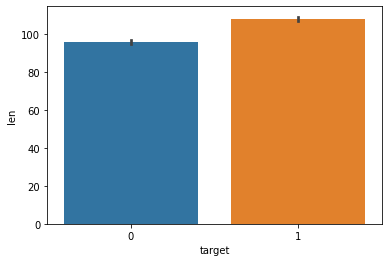

In [7]:
sns.barplot(x='target',y='len',data=df1)
plt.show()

In [8]:
for df in range(7613):
    df1['hashtag']=df1.text.str.findall(r'#\w+')
df1['hash_count']=df1.hashtag.str.len()
df1.head()

,keyword,location,text,target,len,hashtag,hash_count
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,[#earthquake],1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,[],0
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,[],0
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,[#wildfires],1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[#Alaska, #wildfires]",2


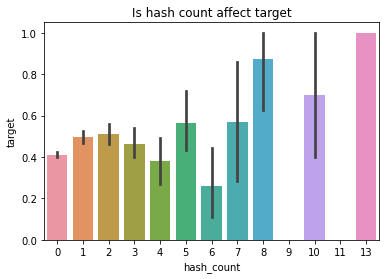

In [9]:
sns.barplot(x='hash_count',y='target',data=df1)
plt.title("Is hash count affect target")
plt.show()

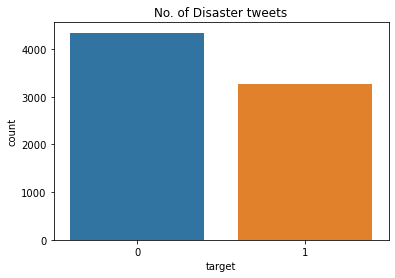

In [10]:
sns.countplot(x='target',data=df1).set_title("No. of Disaster tweets")
plt.show()

In [11]:
df1.describe()

,target,len,hash_count
count,7613.00000,7613.000000,7613.000000
mean,0.42966,101.037436,0.437410
std,0.49506,33.781325,1.085629
min,0.00000,7.000000,0.000000
25%,0.00000,78.000000,0.000000
50%,0.00000,107.000000,0.000000
75%,1.00000,133.000000,0.000000
max,1.00000,157.000000,13.000000


In [12]:
count=CountVectorizer()
tf=TfidfVectorizer()
train_vectors=count.fit_transform(df1['text'][0:5])
train_vectors[0].todense()

matrix([[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]])

In [13]:
train_vectors=count.fit_transform(df1["text"])
test_vectors=count.transform(df_test["text"])

clf=RidgeClassifier()
scores=cross_val_score(clf,train_vectors,df1['target'],cv=3,scoring='f1')
scores.mean()

0.6003132339777876

In [14]:
clf.fit(train_vectors,df1['target'])
submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv") 
submission['target']=clf.predict(test_vectors)
submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [15]:
submission.to_csv("submission.csv",index=False)